# **CSST106 - Perception and Computer Vision**
# **EXERCISE 3**

# **Esguerra, Nashrudin Maverick A. from BSCS-IS-4B**

# ***Advanced Feature Extraction and Image Processing***

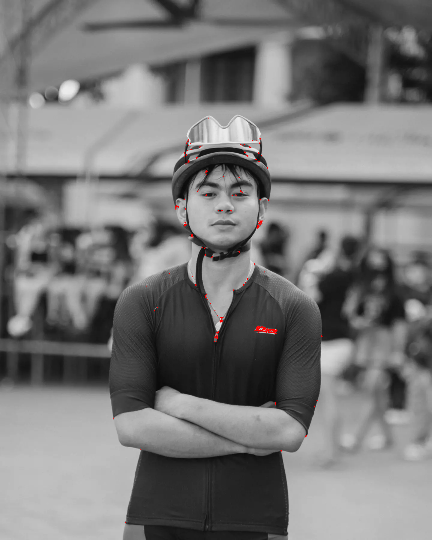

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# 1. Load the image
image = cv2.imread('Nash.jpg')

# 2. Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Convert to float32 (required by cornerHarris)
gray_image_float = np.float32(gray_image)

# 4. Apply Harris Corner Detection
dst = cv2.cornerHarris(gray_image_float, blockSize=2, ksize=3, k=0.04)

# 5. Dilate result for marking the corners
dst = cv2.dilate(dst, None)

# 6. Convert grayscale to a 3-channel image (to mark corners in red)
gray_image_color = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

# 7. Threshold the corners and mark them in red
gray_image_color[dst > 0.01 * dst.max()] = [0, 0, 255]

# 8. Resize the image (scale down to half its original size)
resized_image = cv2.resize(gray_image_color, (0, 0), fx=0.3, fy=0.3)

# 9. Display the result
cv2_imshow(resized_image)



# ***Exercise 2: HOG (Histogram of Oriented Gradients) Feature Extraction***

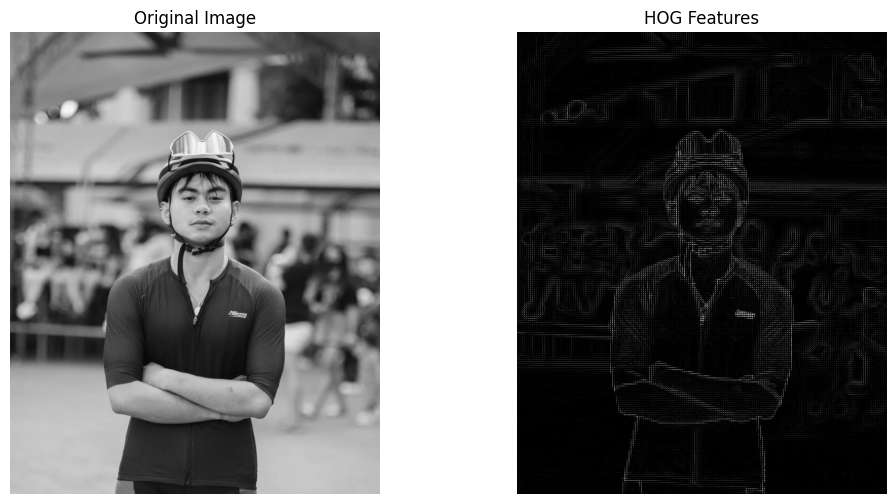

In [2]:
import cv2
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# 1. Load the image
image = cv2.imread('Nash.jpg')

# 2. Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Apply HOG descriptor to extract features
hog_features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), block_norm='L2-Hys', visualize=True)

# 4. Rescale HOG image for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# 5. Plot the original and HOG images
plt.figure(figsize=(12, 6))

# Display the original grayscale image
plt.subplot(1, 2, 1)
plt.axis('off')
plt.title('Original Image')
plt.imshow(gray_image, cmap='gray')

# Display the HOG image with gradient orientations
plt.subplot(1, 2, 2)
plt.axis('off')
plt.title('HOG Features')
plt.imshow(hog_image_rescaled, cmap='gray')

plt.show()


# ***Exercise 3: FAST (Features from Accelerated Segment Test) Keypoint Detection***

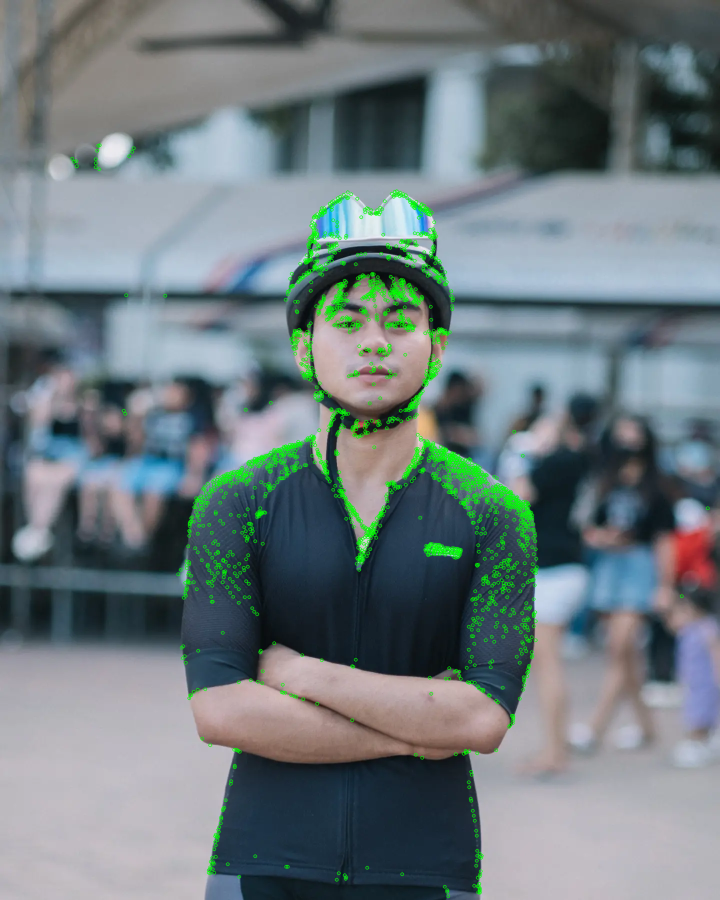

In [4]:
import cv2
from google.colab.patches import cv2_imshow

# 1. Load the image
image = cv2.imread('Nash.jpg')

# 2. Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 3. Create FAST detector
fast = cv2.FastFeatureDetector_create()

# 4. Detect keypoints using FAST
keypoints = fast.detect(gray_image, None)

# 5. Draw the detected keypoints on the original image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(0, 255, 0))

# 6. Resize the image (optional, for display purposes)
resized_image = cv2.resize(image_with_keypoints, (0, 0), fx=0.5, fy=0.5)

# 7. Display the result
cv2_imshow(resized_image)


# ***Exercise 4: Feature Matching using ORB and FLANN***

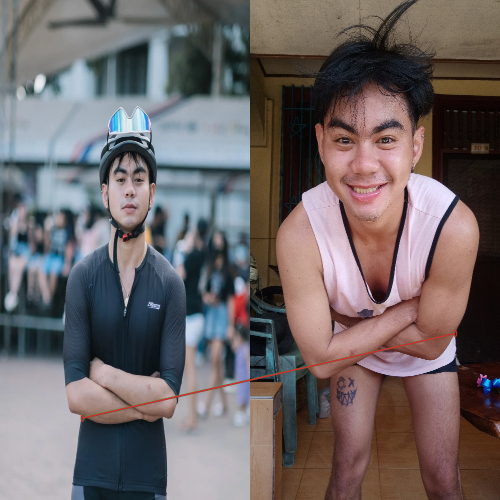

In [10]:
import cv2
from google.colab.patches import cv2_imshow

# 1. Load the two images
image1 = cv2.imread('Nash.jpg')
image2 = cv2.imread('Nash2.jpg')

# 2. Resize both images to the same fixed size
fixed_size = (500, 500)  # Set the desired fixed size (width, height)
image1_resized = cv2.resize(image1, fixed_size)
image2_resized = cv2.resize(image2, fixed_size)

# 3. Convert the images to grayscale
gray1 = cv2.cvtColor(image1_resized, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2_resized, cv2.COLOR_BGR2GRAY)

# 4. Initialize the ORB detector
orb = cv2.ORB_create()

# 5. Detect keypoints and compute descriptors
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# 6. Create FLANN matcher parameters
FLANN_INDEX_LSH = 6
index_params = dict(algorithm=FLANN_INDEX_LSH, table_number=6, key_size=12, multi_probe_level=1)
search_params = dict(checks=50)  # or pass empty dictionary

# 7. Create the FLANN matcher and match the descriptors
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# 8. Store all the good matches using the Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# 9. Draw the matches on the images
matched_image = cv2.drawMatches(image1_resized, keypoints1, image2_resized, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 10. Resize the matched image to a fixed size (if desired, for displaying)
# This step can be adjusted to your needs
final_size = (500, 500)  # Set the desired final size for display
resized_matched_image = cv2.resize(matched_image, final_size)

# 11. Display the result
cv2_imshow(resized_matched_image)


# ***Exercise 5: Image Segmentation using Watershed Algorithm***

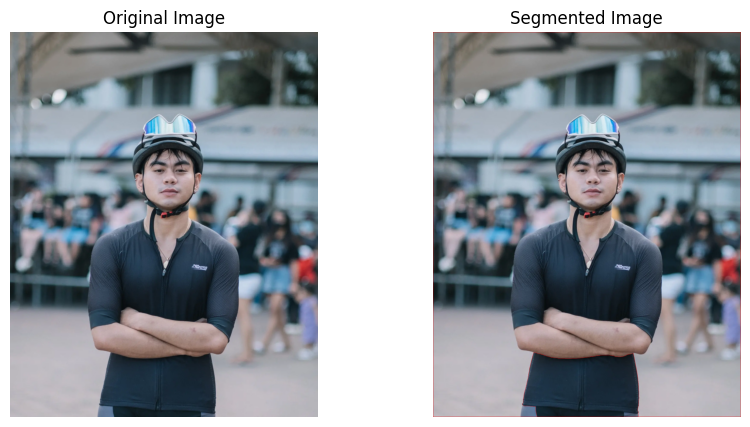

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load an image
image = cv2.imread('Nash.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Step 2: Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Step 3: Apply a threshold to convert the image to binary
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Step 4: Remove noise using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

# Step 5: Identify sure background and sure foreground
sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Step 6: Identify unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Step 7: Mark the markers for the watershed algorithm
markers = cv2.connectedComponents(sure_fg)[1]
markers = markers + 1  # Increment all markers by 1
markers[unknown == 255] = 0  # Mark the unknown region with zero

# Step 8: Apply the Watershed algorithm
segmented_image = image.copy()
cv2.watershed(segmented_image, markers)

# Step 9: Mark the boundaries
segmented_image[markers == -1] = [255, 0, 0]  # Mark boundaries in red

# Step 10: Visualize and display the segmented regions
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')

plt.show()
